# X and y Data Creation

X_data: shape (n_windows, samples_per_window, n_components) 

y_precise: exact sample-level earthquake labels

y_condensed: binary labels per window (0=no earthquake, 1=earthquake)

In [1]:
import os
import numpy as np
from obspy import read
from mseed2npy import integrate_preprocessing_and_labeling
import matplotlib.pyplot as plt

Read and merge the stream data (merging is needed for most cases!)

In [ ]:
stream = read('/home/ege/rawcovar_data/OLD_2020-09/raw_mseeds/gazk.mseed')
stream.merge()

3 Trace(s) in Stream:
KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T22:52:27.700000Z | 100.0 Hz, 8244937 samples (masked)
KO.GAZK..HHN | 2020-09-08T23:58:17.630000Z - 2020-09-09T22:52:26.010000Z | 100.0 Hz, 8244839 samples (masked)
KO.GAZK..HHZ | 2020-09-08T23:58:17.730000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 8244839 samples (masked)

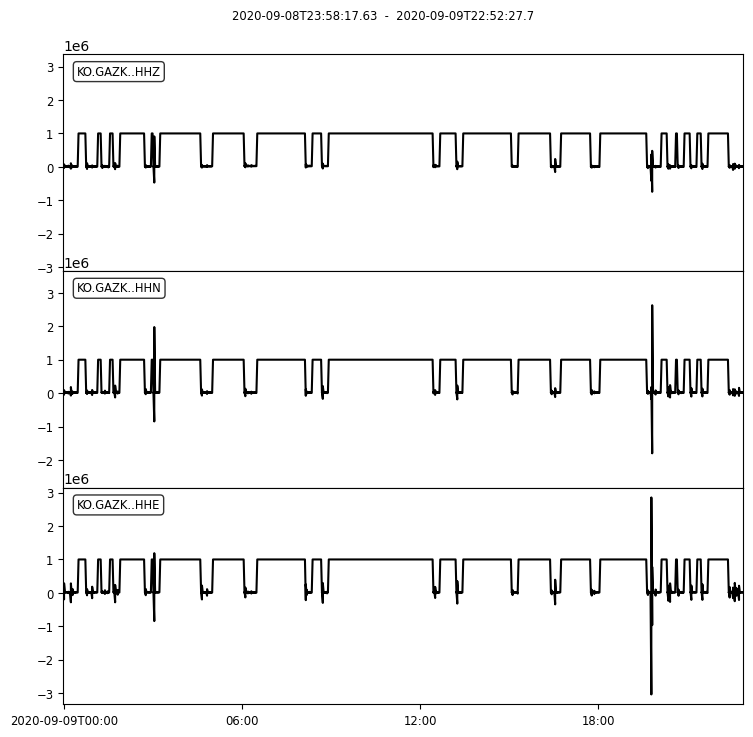

In [16]:
stream.plot();

In [17]:
#Remove additional traces if needed
for tr in stream.select(channel="HN*"):
    stream.remove(tr)  
stream

3 Trace(s) in Stream:
KO.GAZK..HHE | 2020-09-08T23:58:18.340000Z - 2020-09-09T22:52:27.700000Z | 100.0 Hz, 8244937 samples (masked)
KO.GAZK..HHN | 2020-09-08T23:58:17.630000Z - 2020-09-09T22:52:26.010000Z | 100.0 Hz, 8244839 samples (masked)
KO.GAZK..HHZ | 2020-09-08T23:58:17.730000Z - 2020-09-09T22:52:26.110000Z | 100.0 Hz, 8244839 samples (masked)

In [18]:
X_data, y_precise, y_condensed = integrate_preprocessing_and_labeling(stream, 'station_arrivals.csv',output_dir='processed_data') 
print(f"Processed data shape: {X_data.shape}")
print(f"Windows with earthquakes: {y_condensed.sum()}/{len(y_condensed)}")

Processing 2747 potential windows...
  Found 687 windows that are good for all traces

Summary:
  Started with 2747 potential windows
  Kept 687 good windows (25.0%)
  Final shape: (687, 3000, 3)
  Saved to: processed_data/KO.GAZK.20200908_235818.npy

Label summary:
  Created labels for 687 windows
  Windows with earthquakes: 61

Final results:
  X shape: (687, 3000, 3)
  y_precise shape: (687, 3000)
  y_condensed shape: (687,)
  Everything is aligned and ready.
Processed data shape: (687, 3000, 3)
Windows with earthquakes: 61/687


In [5]:
y_condensed.shape, y_precise.shape, X_data.shape

((687,), (687, 3000), (687, 3000, 3))

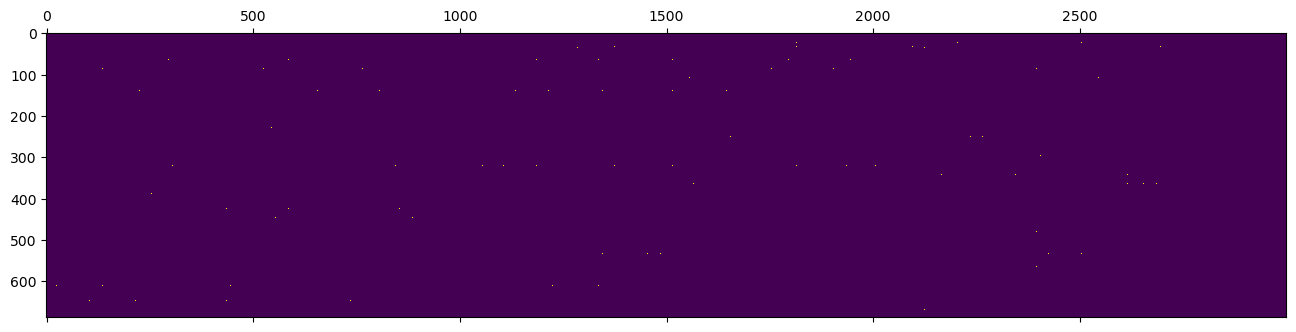

In [6]:
plt.matshow(y_precise)

In [7]:
np.save('y_precise.npy', y_precise)
np.save('y_condensed.npy', y_condensed)
np.save('X_data.npy',X_data)

### Plot a sample window

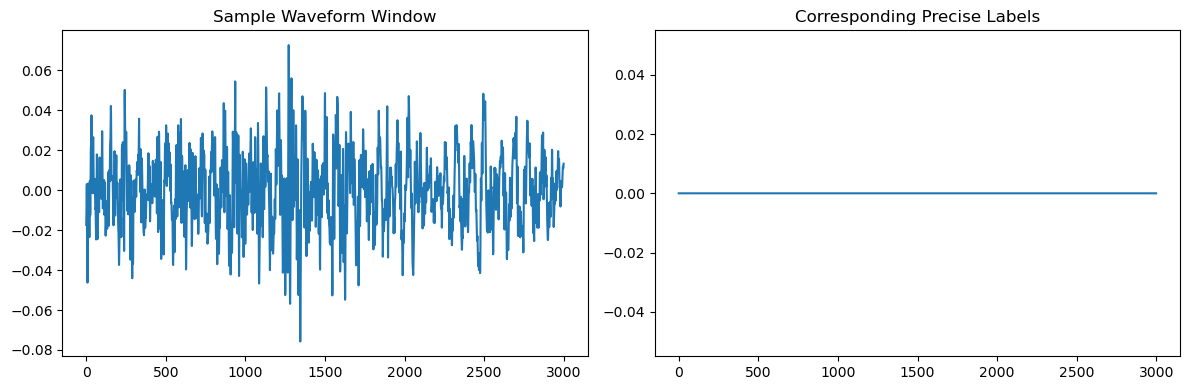

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("Sample Waveform Window")
plt.plot(X_data[222, :, 0])  # First window, first channel
plt.subplot(122)
plt.title("Corresponding Precise Labels")
plt.plot(y_precise[0])
plt.tight_layout()
plt.show()

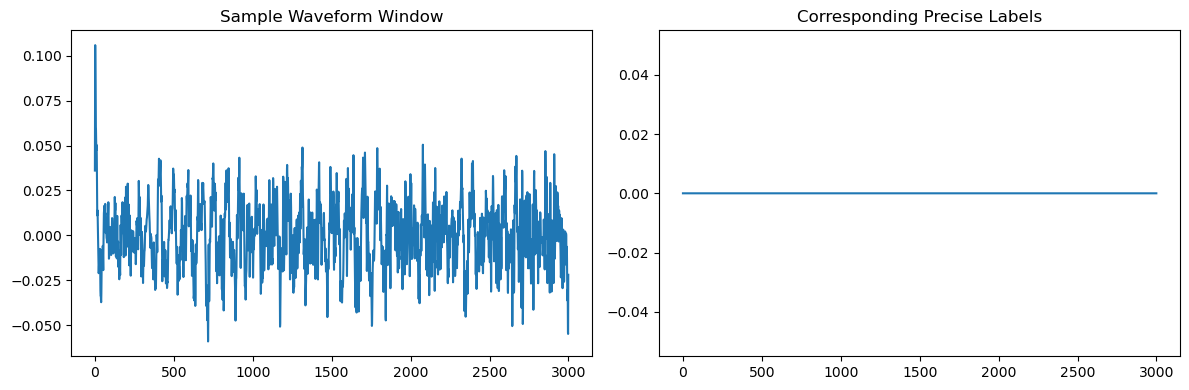

In [ ]:
#import matplotlib.pyplot as plt

#plt.figure(figsize=(12, 4))
#plt.subplot(121)
#plt.title("Sample Waveform Window")
#plt.plot(X_data[222, :, 0])  # First window, first channel
#plt.subplot(122)
#plt.title("Corresponding Precise Labels")
#plt.plot(y_precise[0])
#plt.tight_layout()
#plt.show()